![](https://i.imgur.com/uyKgrYk.gif)

**About Kiva:** Kiva is an international nonprofit, founded in 2005 and based in San Francisco, with a mission to connect people through lending to alleviate poverty. Kiva is in 83 countries, with about 2.7 Million borrowers. Kiva has funded around 1.11 Billion USD worth of loans. It also has around 450 volunteers worldwide.

**Objective of the dataset:** Pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

**Objective of the notebook:** To get a better understanding of the data provided by Kiva and also to discuss ideas for additional data sources. Most of the plots are done using plotly and so will be interactive. Please feel free to hover over the plots to get more insights.

Let us first import the necessary modules.

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

- <a href='#intro'>1. Introduction</a>  
- <a href='#rtd'>2. Retrieving the Data</a>
     - <a href='#ll'>2.1 Load libraries</a>
     - <a href='#rrtd'>2.2 Read the Data</a>
- <a href='#god'>3. Glimpse of Data</a>
     - <a href='#oot'>3.1 Overview of tables</a>
     - <a href='#sootd'>3.2 Statistical overview of the Data</a>


## <a id='intro'>1. Intoduction</a>
----------------------------------------------------------

Let us explore the data now

In [57]:

datadir = '../input/'

In [58]:
loans = pd.read_csv(datadir+'kiva_loans.csv')
loans.head()

In [59]:
region = pd.read_csv(datadir+'loan_themes_by_region.csv')
region.head()

In [60]:
region_location = pd.read_csv(datadir+'kiva_mpi_region_locations.csv')
region_location.head()

In [61]:
loan_id = pd.read_csv(datadir+'loan_theme_ids.csv')
loan_id.head()

There is lot of inofrmation available in loans dataframe, we will try to explore the data and try to apply some visulizations too for better understanding

In [62]:
print(set(loans['country'])) #countries involved in kiva program

In [63]:
#countries with highest number of loans taken
loans.country.value_counts()[:5]


In [64]:
#less number of loans taken/sanctioned by/to these countries
loans.country.value_counts()[-5:]

In [65]:
#ascending order of sectors to which loans were sanctioned
loans.sector.value_counts()


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
loans.head(2)

In [68]:
# sns.barplot(x = 'sector',y='loan_amount',data=loans)
# plt.figure()
plt.figure(figsize=(10,5))
sns.barplot(x = 'sector',y='loan_amount',data = loans)
plt.xticks(rotation = 90)
plt.title('Loan amonut sanctioned to different sectors')
plt.show()

In [69]:
plt.figure(figsize=(10,5))
sns.countplot('sector',data=loans)
plt.xticks(rotation=90)
plt.title('different sectors and their count')
plt.show()

In [70]:
temp = pd.DataFrame(loans.country.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['country','count']
temp

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'country',y = 'count',data=temp)
plt.xticks(rotation=90)
plt.title('countries with more number of loans')
plt.show()

In [72]:
loans['repayment_interval'].value_counts().sort_values(ascending=False)

In [73]:
sns.countplot('repayment_interval',data=loans)

In [74]:
loans['activity'].value_counts().sort_values(ascending=False)[:5]

In [75]:
temp = pd.DataFrame(loans.activity.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['activity','count']
temp

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'activity',y = 'count',data=temp)
plt.xticks(rotation=90)
plt.show()

In [77]:
temp = pd.DataFrame(loans.region.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['region','count']
print(temp)
sns.barplot(x = 'region',y = 'count',data=temp)
plt.xticks(rotation=90)
plt.show()

In [78]:
loans.term_in_months.value_counts().head(10)

In [79]:
loans[loans.lender_count==0].head()
#these are the loans with out invovling any lender

In [80]:
loans.lender_count.sort_values(ascending=False).head()
#dont get confused,the max lenders for a loan is 2986 and the left side number 70499 is the id to pull the record

In [81]:

max(loans.lender_count)


In [82]:
loans[loans.lender_count==2986]

# If you like it please upvote for me 
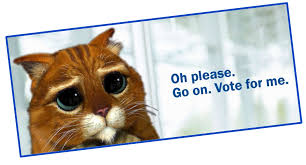